# Defining Problem Statement and Analysing basic metrics

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries

## Importing the Libraries

To analyze this business case we need 4 important libraries of python

1. **numpy :** Used to analyze multidimensional arrays and provide mathematical functions that operate on these arrays efficently.

2. **pandas:** Powerful data analysis and manipulation library for Python.

3. **matplotlib.pyplot**: Python Data Visualisation Library.

4. **seaborn**: Data visualisation library based on matplotlib used to create attractive and informative visualisation




In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Importing the Dataset

Using read_csv() we can import dataset in Google Colab or Jupyter notebook

In [112]:
data=pd.read_csv('netflix.csv')

In [113]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## Basic Analysis:
Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

### Shape of Data

In [114]:
data.shape

(8807, 12)

Analysis:
Shape of the Dataframe is 8807*12 which means it contains 8807 rows and 12 columns

### Columns in a DataFrame

In [115]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### First 5 rows

In [116]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Analysis**:

1.  'cast','country'and'listed_in'  are nested columns.
2. There are missing values in columns like 'country','cast','director'.
3.'date_added' is a object (string) type column.


### Data-type of all attributes(columns)

**info()** method returns a concise summary of a DataFrame, including information about the data types, memory usage, and the number of non-null values in each column.

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Analysis:**

1. All columns in a dataframe are of object-type except 'release_year'.
2. No. of int64 columns=1, No. of object-type columns=11
3. List of columns that contains missing values:
       a.cast
       b.director
       c.country
       d.date_added
4. Memory usage by datframe is 825.8 KB approx

### Statistical summary

 **Statistical summary of Numeric-column**

In [118]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


**Statistical summary of object columns**

In [119]:
#Transpose the data frame to get the total entries,unique type for each col such as type has two categories movie and season
data.describe(include=object).T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# Non-Visual Analysis:Value counts and Unique attributes

## Type column

**Unique**

In [120]:
data['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

**Analysis**: Netflix has two main types of content: movies and TV shows.

**Value counts**

In [121]:
data['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

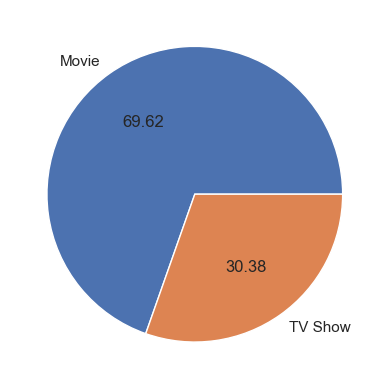

In [122]:
plt.pie(data['type'].value_counts(),labels=data['type'].unique(),autopct='%.2f')
plt.show()

**Insight**: Approximately 70% of Netflix's content consists of movies, with the remaining 30% dedicated to TV shows.

## Title column

**Unique**

In [123]:
data['title'].unique()

array(['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', ...,
       'Zombieland', 'Zoom', 'Zubaan'], dtype=object)

List of unique values in a title column

In [124]:
data['title'].nunique()

8807

**Value counts**

In [125]:
data['title'].value_counts()

title
Dick Johnson Is Dead                     1
Ip Man 2                                 1
Hannibal Buress: Comedy Camisado         1
Turbo FAST                               1
Masha's Tales                            1
                                        ..
Love for Sale 2                          1
ROAD TO ROMA                             1
Good Time                                1
Captain Underpants Epic Choice-o-Rama    1
Zubaan                                   1
Name: count, Length: 8807, dtype: int64

## Cast column

**Unique**

In [126]:
data['cast'].unique()

array([nan,
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      dtype=object)

In [127]:
data['cast'].nunique()

7692

**Value count**

In [128]:
data['cast'].value_counts()

cast
David Attenborough                                                                                                                                                                            19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousam, Swapnil                                                                                                       14
Samuel West                                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                                    7
David Spade, London Hughes, Fortune Feimster                                                                                                                                                   6
                              

**Analysis**: Cast column is a nested column

## Duration column

**Unique**

In [129]:
data['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

**Analysis**:Duration column is of object type. Going forward I need to convert this column into numeric column to draw some important insights.

In [130]:
data['duration'].nunique()

220

**Value counts**

In [131]:
data['duration'].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

## Date Added column

**Unique**

In [132]:
data['date_added'].unique()

array(['September 25, 2021', 'September 24, 2021', 'September 23, 2021',
       ..., 'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [133]:
data['date_added'].nunique()

1767

**Value counts**

In [134]:
data['date_added'].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

**Insight**: On January 1, 2020, Netflix added the most TV shows and movies to its platform.

## Rating Column

 **Unique**

In [135]:
data['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

**Analysis**: There are some incorrect values in the rating column

In [136]:
data['rating'].nunique()

17

**Value counts**

In [137]:
data['rating'].value_counts()

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64

**Insight**: Most of the content on netflix is 'TV-MA' (Mature Audience)  rated.

# Data Preprocessing

## Handling Missing Values

In [138]:
# Percentage of missing values in each column
(data.isnull().sum()/len(data))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

**Analysis**:

1. Approx 30 % data is missing in director column.
2. Approx 9 % data is missing in cast and country column.
3. Less than 1 % data is missing in  date_added,rating and duration column.

### Date added,Duration and Rating Column

 Drop rows containing missing values from Date added , Duration and Rating columns as these columns contain less than 1 % missing data.

In [139]:
data.dropna(subset=['date_added','rating','duration'],inplace=True)

In [140]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

0 missing values in column date_added , duration and rating

### director, cast and country columns

To fill the missing values in the "director," "cast," and "rating" columns, we can use the mode (most frequently occurring value) of each respective column.

In [141]:
data['director'].fillna(data['director'].mode()[0],inplace=True)

C:\Users\supri\AppData\Local\Temp\ipykernel_33796\3038440677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['director'].fillna(data['director'].mode()[0],inplace=True)


In [142]:
data['cast'].fillna(data['cast'].mode()[0],inplace=True)

C:\Users\supri\AppData\Local\Temp\ipykernel_33796\2331639849.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['cast'].fillna(data['cast'].mode()[0],inplace=True)


In [143]:
data['country'].fillna(data['country'].mode()[0],inplace=True)

C:\Users\supri\AppData\Local\Temp\ipykernel_33796\2665234473.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['country'].fillna(data['country'].mode()[0],inplace=True)


In [144]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

0 missing values in 'director','cast' and 'country' columns

## Handling Outliers

### Outlier Detection

1. Using Boxplot we can detect outliers in given data.
2. As there is only 1 numeric column('released_year') in data we can use that to find outliers in the data.

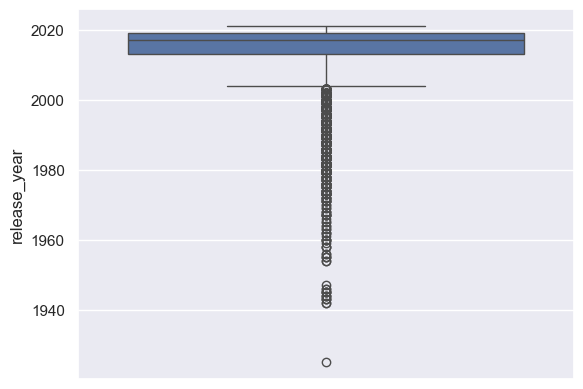

In [145]:
sns.boxplot(data['release_year'])
plt.show()

We have outliers in 'release_year' column => data less than approx 2000 is outlier

***Outlier Detection Formula***

outlier = data < (Q1 - 1.5 * IQR)

outlier = data > (Q3 + 1.5 * IQR)

Where,

Q1-1.5*IQR = Lower Bound

Q3 + 1.5*IQR= Upper Bound

Q1 = Lower quartile

Q3 = Upper quartile

IQR = Q3 - Q1

In [146]:
IQR=stats.iqr(data['release_year'])
upper_bound=stats.scoreatpercentile(data['release_year'],75)+(1.5*IQR)
print('Upper Bound:',upper_bound)
lower_bound=stats.scoreatpercentile(data['release_year'],25)-(1.5*IQR)
print('Lower Bound:',lower_bound)

Upper Bound: 2028.0
Lower Bound: 2004.0


We have outliers in only lower boundry ( data < 2004)

### Outlier Treatment

In [147]:
Outliers_count=len(data.loc[data['release_year'] < lower_bound])
(Outliers_count/len(data))*100

8.156996587030717

Even though approximately 8% of the values are outliers, we choose not to drop them as we want to analyze data related to old movies.

According to boxplot we have 2 % outliers below 1980. Hence , we can drop these outliers

In [148]:
i=np.where(data['release_year']<1980)[0]
i

array([  41,   42,  177,  529,  542,  716,  819, 1126, 1331, 1699, 1719,
       1817, 2365, 2368, 2369, 2373, 2375, 2376, 2487, 2491, 2492, 4217,
       4250, 4550, 4551, 4552, 4861, 5186, 5220, 5295, 5300, 5303, 5391,
       5396, 5400, 5461, 5544, 5548, 5611, 5703, 6026, 6027, 6106, 6125,
       6248, 6278, 6344, 6352, 6389, 6417, 6425, 6442, 6467, 6479, 6490,
       6527, 6543, 6613, 6668, 6695, 6740, 6765, 6775, 6778, 6844, 6855,
       6884, 6950, 6997, 7048, 7112, 7120, 7123, 7208, 7213, 7282, 7317,
       7319, 7354, 7417, 7516, 7560, 7622, 7644, 7728, 7775, 7810, 7824,
       7863, 7864, 7878, 7914, 7916, 7938, 8047, 8111, 8120, 8172, 8188,
       8220, 8232, 8243, 8286, 8289, 8315, 8384, 8402, 8419, 8489, 8497,
       8510, 8524, 8570, 8618, 8623, 8643, 8700, 8718, 8722, 8728, 8746,
       8775], dtype=int64)

In [149]:
data.drop(index=i,inplace=True)

In [150]:
data.shape

(8668, 12)

## Unnesting nested columns

We have nested data in 4 columns(cast,director,country,listed_in). Therefore we will  have to unnest or split values into 1 or more rows in order to perform analysis and gain some Valuable insights from these columns.

**Unnesting cast column**

In [151]:
constraint= data['cast'].apply(lambda x:str(x).split(',')).tolist()
df_cast=pd.DataFrame(constraint,index=data['title'])
df_cast=df_cast.stack()
df_cast.head()

title                  
Dick Johnson Is Dead  0    David Attenborough
Blood & Water         0            Ama Qamata
                      1           Khosi Ngema
                      2         Gail Mabalane
                      3        Thabang Molaba
dtype: object

In [152]:
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast=df_cast[['title',0]]
df_cast.columns=['title','cast']
df_cast

,title,cast
0,Dick Johnson Is Dead,David Attenborough
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
63998,Zubaan,Manish Chaudhary
63999,Zubaan,Meghna Malik
64000,Zubaan,Malkeet Rauni
64001,Zubaan,Anita Shabdish


**Unnesting director column**

In [153]:
constraint=data['director'].apply(lambda x:str(x).split(',')).tolist()
df_director=pd.DataFrame(constraint,index=data['title'])
df_director=df_director.stack()
df_director.head()

title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0      Rajiv Chilaka
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0      Rajiv Chilaka
Kota Factory           0      Rajiv Chilaka
dtype: object

In [154]:
df_director=pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director=df_director[['title',0]]
df_director.columns=['title','director']
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,Rajiv Chilaka
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,Rajiv Chilaka
4,Kota Factory,Rajiv Chilaka
...,...,...
9459,Zodiac,David Fincher
9460,Zombie Dumb,Rajiv Chilaka
9461,Zombieland,Ruben Fleischer
9462,Zoom,Peter Hewitt


**Unnesting country column**

In [155]:
constraint=data['country'].str.split(',',expand=True)
constraint.set_index(keys=data['title'],inplace=True)
constraint=constraint.stack()
constraint.head()


title                   
Dick Johnson Is Dead   0    United States
Blood & Water          0     South Africa
Ganglands              0    United States
Jailbirds New Orleans  0    United States
Kota Factory           0            India
dtype: object

In [156]:
df_country=pd.DataFrame(constraint)
df_country.reset_index(inplace=True)
df_country=df_country[['title',0]]
df_country.columns=['title','country']
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,United States
3,Jailbirds New Orleans,United States
4,Kota Factory,India
...,...,...
10667,Zodiac,United States
10668,Zombie Dumb,United States
10669,Zombieland,United States
10670,Zoom,United States


**Unnesting listed_in columns**

In [157]:
constraint=data['listed_in'].str.split(',',expand=True)
constraint.set_index(keys=data['title'],inplace=True)
constraint=constraint.stack()
constraint.head()

title                  
Dick Johnson Is Dead  0             Documentaries
Blood & Water         0    International TV Shows
                      1                 TV Dramas
                      2              TV Mysteries
Ganglands             0            Crime TV Shows
dtype: object

In [158]:
df_genre=pd.DataFrame(constraint)
df_genre.reset_index(inplace=True)
df_genre=df_genre[['title',0]]
df_genre.columns=['title','genre']
df_genre

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19016,Zoom,Children & Family Movies
19017,Zoom,Comedies
19018,Zubaan,Dramas
19019,Zubaan,International Movies


**Merging cast and director dataframes**

In [159]:
df1=pd.merge(df_cast,df_director,how='inner',on='title')
df1

,title,cast,director
0,Dick Johnson Is Dead,David Attenborough,Kirsten Johnson
1,Blood & Water,Ama Qamata,Rajiv Chilaka
2,Blood & Water,Khosi Ngema,Rajiv Chilaka
3,Blood & Water,Gail Mabalane,Rajiv Chilaka
4,Blood & Water,Thabang Molaba,Rajiv Chilaka
...,...,...,...
69796,Zubaan,Manish Chaudhary,Mozez Singh
69797,Zubaan,Meghna Malik,Mozez Singh
69798,Zubaan,Malkeet Rauni,Mozez Singh
69799,Zubaan,Anita Shabdish,Mozez Singh


**Merging country listed_in dataframes**

In [160]:
df2=pd.merge(df_country,df_genre,how='inner',on='title')
df2

,title,country,genre
0,Dick Johnson Is Dead,United States,Documentaries
1,Blood & Water,South Africa,International TV Shows
2,Blood & Water,South Africa,TV Dramas
3,Blood & Water,South Africa,TV Mysteries
4,Ganglands,United States,Crime TV Shows
...,...,...,...
23374,Zoom,United States,Children & Family Movies
23375,Zoom,United States,Comedies
23376,Zubaan,India,Dramas
23377,Zubaan,India,International Movies


**Merging df1 and df2**

In [161]:
df_final=pd.merge(df1,df2,how='inner',on='title')
df_final

,title,cast,director,country,genre
0,Dick Johnson Is Dead,David Attenborough,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows
...,...,...,...,...,...
199003,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
199004,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
199005,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
199006,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


**Removing all nested columns from original dataframe**

In [162]:
df_remaining=data.drop(columns=['cast','country','director','listed_in'])
df_remaining

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."


**Finally merging df_remaining and df_final**

In [163]:
netflix_df=pd.merge(df_remaining,df_final,how='inner',on='title')
netflix_df

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",David Attenborough,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
199003,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
199004,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
199005,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
199006,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [164]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
description     0
cast            0
director        0
country         0
genre           0
dtype: int64

## Data type Conversion

**Converting Duration into numeric format**

"Duration" column is currently in an object type format, which prevents us from conducting quantitative analysis, such as calculating the average running time of movies or TV shows. To extract valuable insights from this column, we need to convert it into a numeric format.

In [165]:
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",David Attenborough,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows


In [166]:
netflix_df['duration']=netflix_df['duration'].str.split(' ',expand=True)[0]
netflix_df['duration']=netflix_df['duration'].astype('int')
netflix_df

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90,"As her father nears the end of his life, filmm...",David Attenborough,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
199003,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,International Movies
199004,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Anita Shabdish,Mozez Singh,India,Music & Musicals
199005,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,Dramas
199006,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [167]:
netflix_df['duration']

0          90
1           2
2           2
3           2
4           2
         ... 
199003    111
199004    111
199005    111
199006    111
199007    111
Name: duration, Length: 199008, dtype: int32

**Conveting date_added into datetime format**

In [168]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'],errors='coerce')
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",David Attenborough,Kirsten Johnson,United States,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows


## Adding New Columns

In [169]:
import datetime as dt

In [170]:
netflix_df['year_added']=netflix_df['date_added'].dt.year
netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['day_added']=netflix_df['date_added'].dt.day
netflix_df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,cast,director,country,genre,year_added,month_added,day_added
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",David Attenborough,Kirsten Johnson,United States,Documentaries,2021.0,9.0,25.0
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,International TV Shows,2021.0,9.0,24.0
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Dramas,2021.0,9.0,24.0
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Ama Qamata,Rajiv Chilaka,South Africa,TV Mysteries,2021.0,9.0,24.0
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",Khosi Ngema,Rajiv Chilaka,South Africa,International TV Shows,2021.0,9.0,24.0


In [171]:
netflix_df.shape

(199008, 15)

# Visual Analysis

## Univariate Analysis

### Continuos-Histogram

**Q: Distribution of run time of movies?**

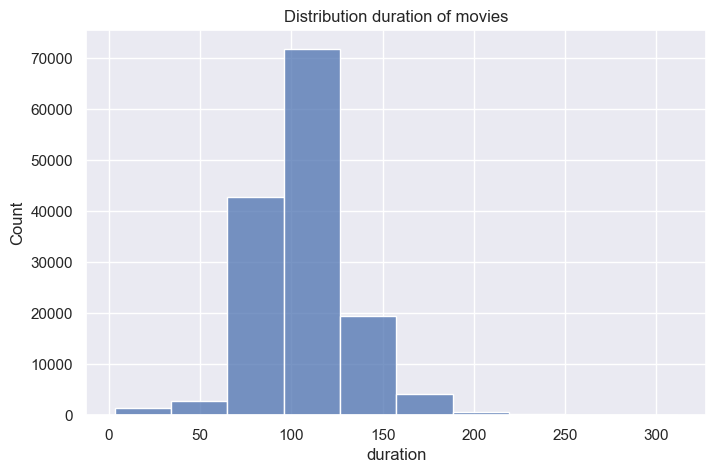

In [172]:
movies=netflix_df.loc[netflix_df['type']=='Movie']
plt.figure(figsize=(8,5))
sns.histplot(movies['duration'],bins=10)
plt.title('Distribution duration of movies')
plt.show()

**Insight**: Most of the movies have runtime between 100-125 minutes

### Continuous-Boxplot

**Distribution of Duration**

In [173]:
tv_shows=netflix_df.loc[netflix_df['type']=='TV Show']

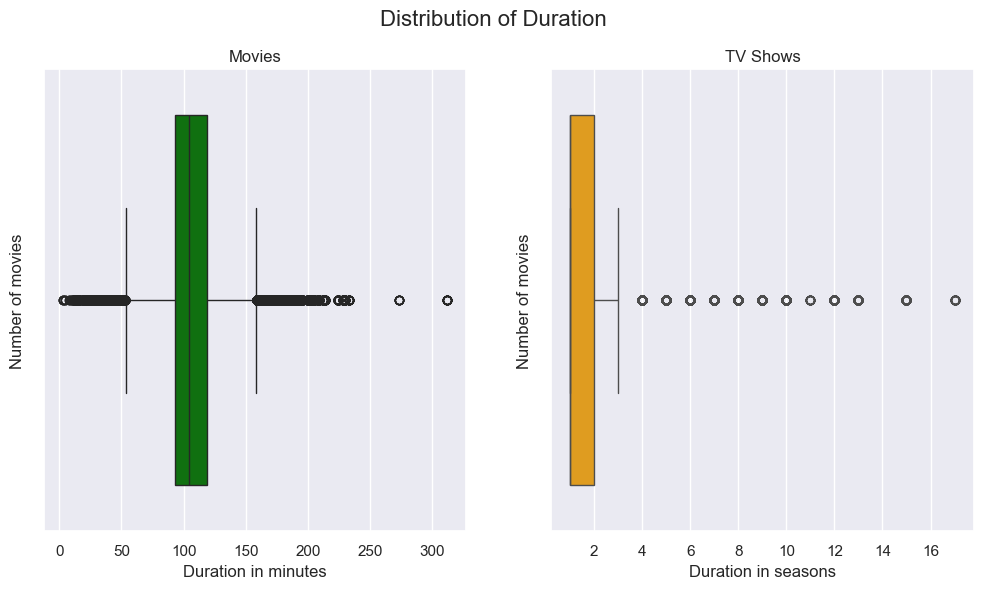

In [174]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data=movies,x='duration',color='green')
plt.xlabel('Duration in minutes',fontsize=12)
plt.ylabel('Number of movies',fontsize=12)
plt.title('Movies')
plt.subplot(1,2,2)
sns.boxplot(data=tv_shows,x='duration',color='orange')
plt.xlabel('Duration in seasons',fontsize=12)
plt.ylabel('Number of movies',fontsize=12)
plt.title('TV Shows')
plt.suptitle('Distribution of Duration',fontsize=16)
plt.show()


**Analysis - Movies**

In [175]:
IQR=stats.iqr(movies['duration'])
upper_bound=stats.scoreatpercentile(movies['duration'],75)+(1.5*IQR)
print('Maximum runtime of movies:',upper_bound)
lower_bound=stats.scoreatpercentile(movies['duration'],25)-(1.5*IQR)
print('Median runtime of movies:',movies['duration'].median())
print('Average runtime of movies:',movies['duration'].mean().round(2))
print('Minimum runtime of movies:',lower_bound)


Maximum runtime of movies: 158.0
Median runtime of movies: 104.0
Average runtime of movies: 106.62
Minimum runtime of movies: 54.0


**Insights**:

1. Maximum duration of movies is 158 minutes.
2. 50% of movies have duration of 104 minutes.
3. Average duration of movies is 106 minutes.

**Analysis- TV Shows**

In [176]:
IQR=stats.iqr(tv_shows['duration'])
upper_bound=stats.scoreatpercentile(tv_shows['duration'],75)+(1.5*IQR)
print('Maximum runtime of movies:',upper_bound)
lower_bound=stats.scoreatpercentile(tv_shows['duration'],25)-(1.5*IQR)
print('Median runtime of movies:',tv_shows['duration'].median())
print('Average runtime of movies:',tv_shows['duration'].mean().round(2))
print('Minimum runtime of movies:',lower_bound)

Maximum runtime of movies: 3.5
Median runtime of movies: 1.0
Average runtime of movies: 1.92
Minimum runtime of movies: -0.5


**Insights**:
1. Maximum duration of tv shows is 3.5 seasons.
2. Median duration of  tv shows is 1 season.
3. Average duration of tv shows is approx 2 seasons.

### Categorical - Barplot

**Country-wise Distribution of Content on Netflix**

In [177]:
country_df=netflix_df.groupby(['country'])['title'].nunique().reset_index()
country_df.sort_values(by='title',ascending=False,inplace=True)

In [178]:
country_df.drop(index=[104,34],inplace=True)

In [179]:
country_df.shape

(193, 2)

In [180]:
country_df.head(20)

,country,title
189,United States,3983
139,India,989
188,United Kingdom,615
120,Canada,268
146,Japan,254
177,South Korea,211
130,France,209
179,Spain,180
103,United Kingdom,173
19,Canada,170


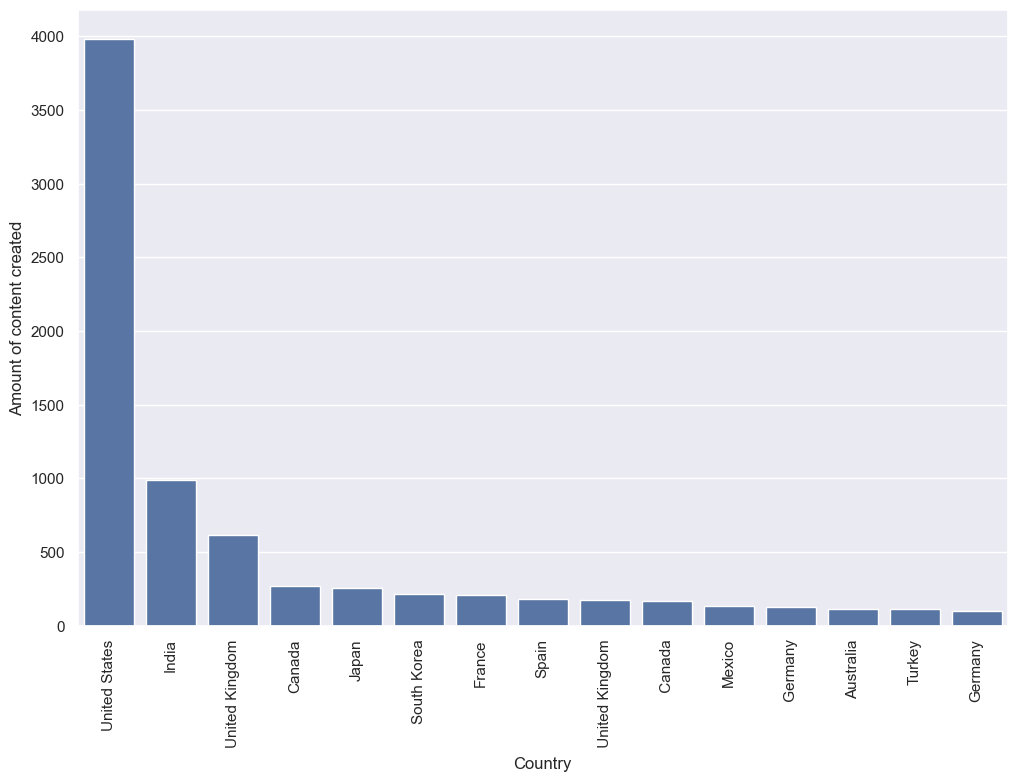

In [181]:
plt.figure(figsize=(12,8))
sns.barplot(data=country_df.head(15),x='country',y='title')
sns.set(style='darkgrid')
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Amount of content created')
plt.show()

**Insight**:
Majority of content on Netflix is produced by the United States, India, the United Kingdom, Canada and Japan.

In [182]:
country_df.tail(15)

,country,title
69,Nicaragua,1
141,Iran,1
65,Namibia,1
63,Montenegro,1
62,Mongolia,1
145,Jamaica,1
58,Malawi,1
151,Luxembourg,1
54,Latvia,1
53,Kuwait,1


**Genre Distribution of Movies and TV Shows on Netflix**

In [183]:
genre_movie=movies.groupby(['genre'])['show_id'].nunique().reset_index()
genre_movie.sort_values(by=['show_id'],ascending=False,inplace=True)
genre_movie=genre_movie.head(25)
genre_movie

,genre,show_id
10,International Movies,2578
25,Dramas,1582
22,Comedies,1188
18,Action & Adventure,844
24,Documentaries,814
6,Dramas,803
9,Independent Movies,727
13,Romantic Movies,605
20,Children & Family Movies,597
17,Thrillers,504


In [184]:
genre_tv_show=tv_shows.groupby(['genre'])['show_id'].nunique().reset_index()
genre_tv_show.sort_values(by=['show_id'],ascending=False,inplace=True)
genre_tv_show=genre_tv_show.head(25)
genre_tv_show

,genre,show_id
24,International TV Shows,767
13,TV Dramas,693
3,International TV Shows,572
12,TV Comedies,449
22,Crime TV Shows,397
25,Kids' TV,383
7,Romantic TV Shows,336
20,British TV Shows,246
23,Docuseries,218
19,Anime Series,173


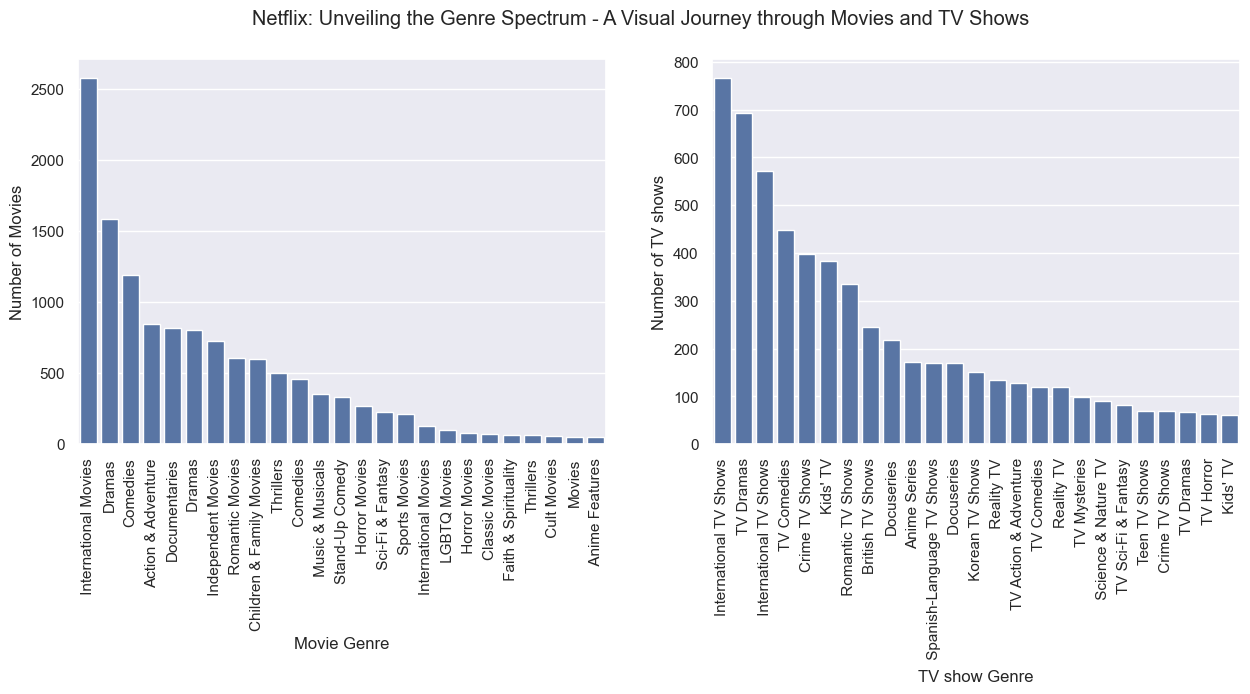

In [185]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(data=genre_movie,x='genre',y='show_id')
plt.xticks(rotation=90)
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies')

plt.subplot(1,2,2)
sns.barplot(data=genre_tv_show,x='genre',y='show_id')
plt.xticks(rotation=90)
plt.xlabel('TV show Genre')
plt.ylabel('Number of TV shows')

plt.suptitle('Netflix: Unveiling the Genre Spectrum - A Visual Journey through Movies and TV Shows')
plt.show()

**Insights:**

1. International movies and TV shows emerge as the most popular genre on Netflix, captivating a significant audience.
2. Comedy and Drama is also popular genres among netflix audience.
3. Crime TV shows are also among the trending genres on Netflix, as viewers also have a strong affinity for this genre, highlighting its popularity among the audience.
4. Kids TV shows and movies hold significant popularity among young viewers, establishing them as a one of the trending genre on Netflix.
5. Anime series and TV shows have gained substantial traction among the teen audience, securing a prominent place on the binge-to-watch list due to their popularity and appeal.
6. Despite the vast content selection on Netflix, sci-fi movies and TV shows remain relatively less popular compared to other genres, attracting a smaller audience.

**Distribution of rating across content on Netflix**

In [186]:
rating_df=netflix_df.groupby(['rating'])['show_id'].nunique().reset_index()
rating_df.sort_values(by='show_id',ascending=False,inplace=True)
rating_df

,rating,show_id
8,TV-MA,3178
6,TV-14,2125
9,TV-PG,847
5,R,783
4,PG-13,479
11,TV-Y7,329
10,TV-Y,305
3,PG,278
7,TV-G,214
2,NR,79


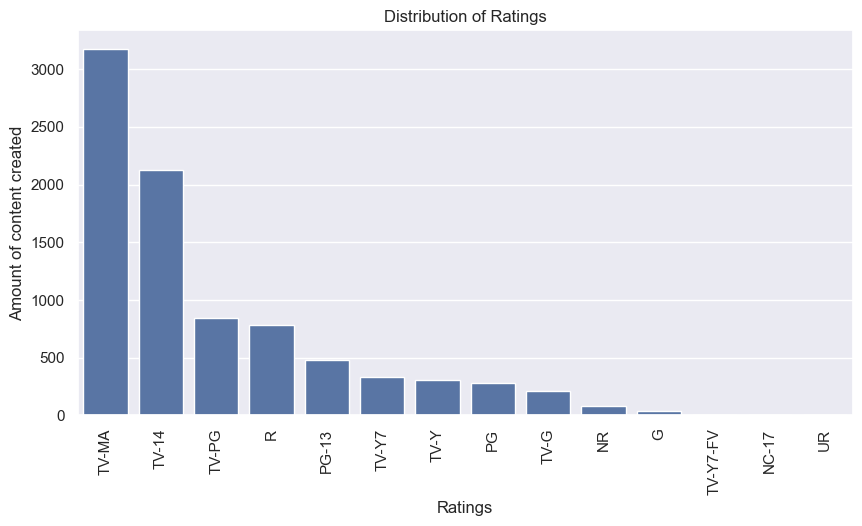

In [187]:
plt.figure(figsize=(10,5))
sns.barplot(data=rating_df,x='rating',y='show_id')
plt.xticks(rotation=90)
plt.xlabel('Ratings')
plt.ylabel('Amount of content created')
plt.title('Distribution of Ratings')
plt.show()


**Insights**:

1. TV-MA (18+) rated content is most popular content in netflix.
2. For kids and Teens TV-14 and TV-PG rated content is also popular on Netflix.
3. Viewers also like to watch R-rated(restricted) content on Netflix.

## Bivariate Analysis

### Numeric- Categorical

**Netflix Content Distribution Over the Years**

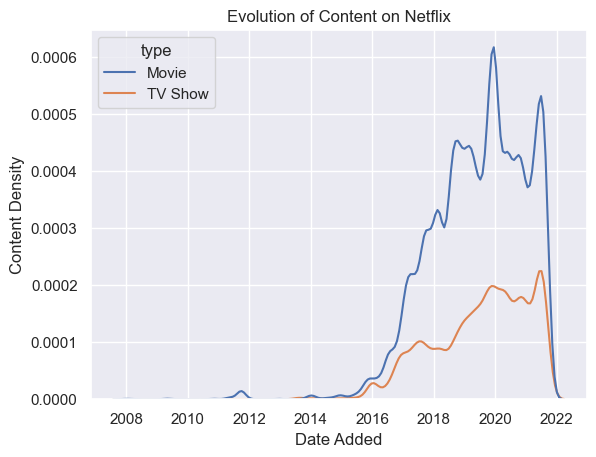

In [188]:
sns.kdeplot(data=netflix_df,x='date_added',hue='type')
sns.set(style='whitegrid')
plt.title('Evolution of Content on Netflix')
plt.xlabel('Date Added')
plt.ylabel('Content Density')
plt.show()


**Insight**:
1. Over the years Netflix had added more number of movies as compared to TV shows.
2.  Between 2018 and 2021, Netflix experienced a substantial surge in content additions to its watchlist, reflecting a significant expansion of its library during that period.

**Distribution of duration across genres**

In [189]:
top5_actors= netflix_df.groupby(['cast'])['title'].nunique().reset_index()
top5_actors.sort_values(by='title',ascending=False,inplace=True)
top5_actors=top5_actors.head(5)
top5_actors

,cast,title
34698,David Attenborough,827
2577,Anupam Kher,39
26650,Rupa Bhimani,31
29969,Takahiro Sakurai,30
15371,Julie Tejwani,28


In [190]:
top3_genre= netflix_df.groupby(['genre'])['title'].nunique().reset_index()
top3_genre.sort_values(by='title',ascending=False,inplace=True)
top3_genre=top3_genre.head(3)
top3_genre

,genre,title
13,International Movies,2578
49,Dramas,1582
44,Comedies,1188


In [191]:
top3_df=netflix_df.loc[(netflix_df['cast'].isin(top5_actors['cast']))&(netflix_df['genre'].isin(top3_genre['genre']))]
top3_df['cast'].value_counts()

cast
David Attenborough    334
 Anupam Kher           58
 Takahiro Sakurai       7
Name: count, dtype: int64

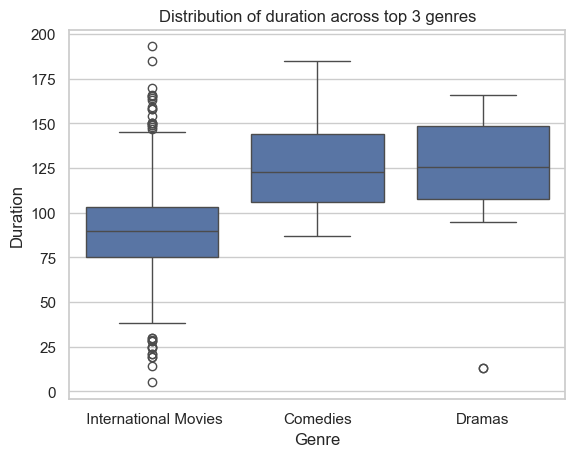

In [192]:
sns.boxplot(data=top3_df,x='genre',y='duration')
plt.xlabel('Genre')
plt.ylabel('Duration')
plt.title('Distribution of duration across top 3 genres')
sns.set()
plt.show()

**Analysis**:
1. International Movies have largest spread as compared to other 2 genres. International movies have median duration of  90 minutes.

2. Comedy and Drama genre has exactly same spread with median duration of approx 120 minutes.


### Categorical-Categorical

**Exploring popular actors on Netflix across genres**

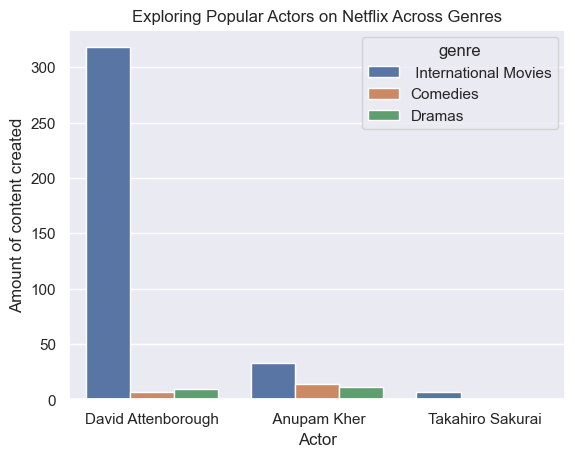

In [193]:
sns.countplot(data=top3_df,x='cast',hue='genre')
plt.xlabel('Actor')
plt.ylabel('Amount of content created')
plt.title('Exploring Popular Actors on Netflix Across Genres')
plt.show()

**Insight**:
1. David Attenborough is a most popular actor on Netflix who mostly worked in International Movies genre.
2. Anupam Kher is a most popular Indian actor on Netflix who worked across each genre.
3. Takahiro Sakurai is worked only in a International Movies genre.

## Multivariate analysis

### Trending movie genres

In [194]:
top_movie_genre=movies['genre'].value_counts().index[0:4]
top_movie_genre

Index([' International Movies', 'Dramas', 'Comedies', 'Action & Adventure'], dtype='object', name='genre')

In [195]:
top_movie_df=movies.loc[movies['genre'].isin(top_movie_genre)]
top_movie_df=top_movie_df.groupby(['year_added','genre'])['title'].nunique().reset_index()
top_movie_df.head()


,year_added,genre,title
0,2008.0,Dramas,1
1,2009.0,International Movies,1
2,2009.0,Dramas,1
3,2011.0,International Movies,1
4,2011.0,Dramas,12


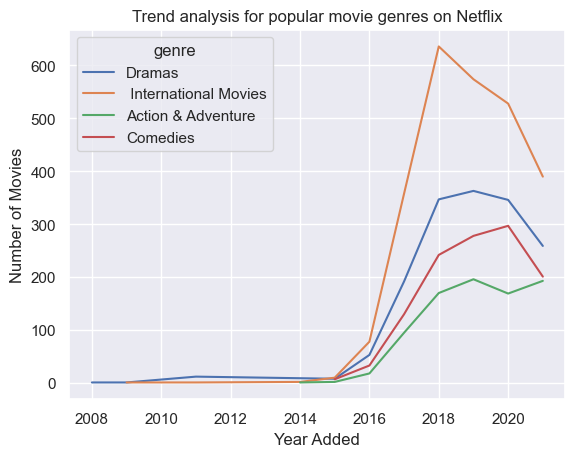

In [196]:
sns.lineplot(data=top_movie_df,x='year_added',y='title',hue='genre')
plt.title('Trend analysis for popular movie genres on Netflix')
sns.set(style='darkgrid')
plt.xlabel('Year Added')
plt.ylabel('Number of Movies')
plt.show()

**Insight**:
1. Netflix witnessed a consistent increase in the number of movies added to its content library across various genres between 2016 and 2018.
2.  Starting from 2020, there has been a notable upward trend in the number of action genre movies added to Netflix's library, while other genres have experienced a decreasing trend.


### Trending TV genres

In [197]:
top_tv_genre=tv_shows['genre'].value_counts().index[0:4]
top_tv_genre

Index([' TV Dramas', 'International TV Shows', ' International TV Shows',
       'Crime TV Shows'],
      dtype='object', name='genre')

In [198]:
top_tv_df=tv_shows.loc[tv_shows['genre'].isin(top_tv_genre)]
top_tv_df=top_tv_df.groupby(['year_added','genre'])['title'].nunique().reset_index()
top_tv_df.head()

,year_added,genre,title
0,2013.0,TV Dramas,1
1,2013.0,Crime TV Shows,1
2,2014.0,TV Dramas,2
3,2014.0,Crime TV Shows,1
4,2015.0,International TV Shows,2


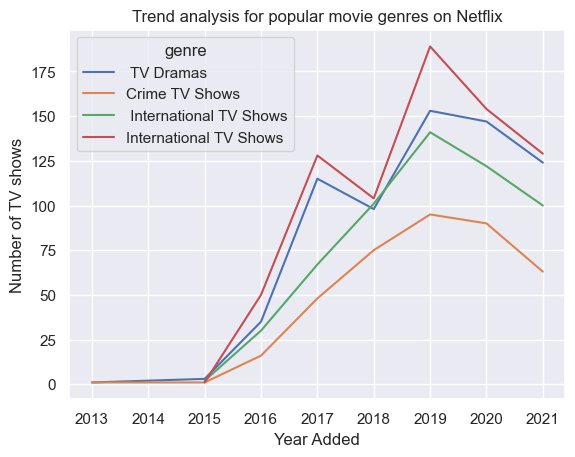

In [199]:
sns.lineplot(data=top_tv_df,x='year_added',y='title',hue='genre')
plt.title('Trend analysis for popular movie genres on Netflix')
sns.set(style='darkgrid')
plt.xlabel('Year Added')
plt.ylabel('Number of TV shows')
plt.show()

**Insight**:
1. Netflix witnessed a consistent increase in the number of tv shows added to its content library across various genres between  2018 and 2019.
2.  Starting from 2020, there has been a notable downward trend in the across each popular genre.


**Analysis**: There is no correlation among numeric attributes for given data.

In [200]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [201]:
data['show_id']=pd.to_numeric(data['show_id'],errors='coerce').astype('Int64')


In [202]:
data.dtypes


show_id          Int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [203]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,<NA>,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,<NA>,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,<NA>,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,<NA>,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,<NA>,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [204]:
data['show_id']=data['show_id'].fillna(1).astype(int)

In [205]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [206]:
data.dtypes

show_id          int32
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [207]:
data['date_added']=pd.to_datetime(data['date_added'],errors='coerce')

In [208]:
data['date_added']=data['date_added'].dt.year


In [209]:

data.dtypes

show_id           int32
type             object
title            object
director         object
cast             object
country          object
date_added      float64
release_year      int64
rating           object
duration         object
listed_in        object
description      object
dtype: object

In [210]:
data['rating']=data['rating'].astype('category')

In [211]:
data.dtypes

show_id            int32
type              object
title             object
director          object
cast              object
country           object
date_added       float64
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

In [212]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,2021.0,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021.0,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,1,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021.0,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,1,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,2021.0,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,1,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021.0,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [213]:
data['duration'] = data['duration'].str.replace(' min', '')
data['duration'] = pd.to_numeric(data['duration'],errors='coerce', downcast='integer')
print(data.head())
print(data.dtypes)

   show_id     type                  title         director  \
0        1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1        1  TV Show          Blood & Water    Rajiv Chilaka   
2        1  TV Show              Ganglands  Julien Leclercq   
3        1  TV Show  Jailbirds New Orleans    Rajiv Chilaka   
4        1  TV Show           Kota Factory    Rajiv Chilaka   

                                                cast        country  \
0                                 David Attenborough  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
3                                 David Attenborough  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

   date_added  release_year rating  duration  \
0      2021.0          2020  PG-13      90.0   
1      2021.0          2021  TV-MA       NaN   
2      2021.0          2021  TV-MA       NaN   
3 

In [214]:
data.isnull().sum()

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added        86
release_year       0
rating             0
duration        2642
listed_in          0
description        0
dtype: int64

In [217]:
data.dropna(subset=['duration'], inplace=True)

In [218]:
data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      86
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [219]:
data.dropna(subset=['date_added'], inplace=True)

In [220]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [221]:
data.dtypes

show_id            int32
type              object
title             object
director          object
cast              object
country           object
date_added       float64
release_year       int64
rating          category
duration         float64
listed_in         object
description       object
dtype: object

In [ ]:
data.to_csv('